In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [2]:
df_cct = pd.read_parquet("/Users/edouardpenel/Desktop/ENSAE 2A/Statapp/Code/Données/df_cct_final.parquet")

## I. OneHotEncoder

In [3]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [4]:
# Pour "Merchant State" : 

enc = OneHotEncoder(handle_unknown='ignore',  max_categories=10) #on se limite aux 10 premières catégories

features_array = enc.fit_transform(df_cct[["Merchant State"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

TypeError: __init__() got an unexpected keyword argument 'max_categories'

In [7]:
# Pour "Merchant City" : 

enc = OneHotEncoder(handle_unknown='ignore',  max_categories=10)

features_array = enc.fit_transform(df_cct[["Merchant City"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

TypeError: __init__() got an unexpected keyword argument 'max_categories'

In [8]:
# Pour "day_of_week" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["day_of_week"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

## II. Sorting the columns and creating X1, y

In [18]:
df_cct

,User,Card,Month,Day,day_of_week,Hours,Amount,Use Chip,Merchant Name,Merchant City,...,bad_pin,insufficient_balance,hr_nbt/last_30d_av_hr_nbt,last_18h_nbt,last_18h_amt,last_3d_amt/nbt,Is Fraud?,Chip Transaction,Online Transaction,Swipe Transaction
0,0,0,9,1,Sunday,6,134.09,Swipe Transaction,3527213246127876953,La Verne,...,0,0,1.000000,1.0,134.09,134.090000,0,0.0,0.0,1.0
1,0,0,9,1,Sunday,6,38.48,Swipe Transaction,-727612092139916043,Monterey Park,...,0,0,1.333333,2.0,172.57,86.285000,0,0.0,0.0,1.0
2,0,0,9,2,Monday,6,120.34,Swipe Transaction,-727612092139916043,Monterey Park,...,0,0,0.750000,1.0,120.34,97.636667,0,0.0,0.0,1.0
3,0,0,9,2,Monday,17,128.95,Swipe Transaction,3414527459579106770,Monterey Park,...,0,0,0.800000,2.0,249.29,105.465000,0,0.0,0.0,1.0
4,0,0,9,3,Tuesday,6,104.71,Swipe Transaction,5817218446178736267,La Verne,...,0,0,0.833333,2.0,233.66,105.314000,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2,27,Thursday,22,-54.00,Chip Transaction,-5162038175624867091,Merrimack,...,0,0,1.610738,7.0,369.71,62.315294,0,1.0,0.0,0.0
24386896,1999,1,2,27,Thursday,22,54.00,Chip Transaction,-5162038175624867091,Merrimack,...,0,0,2.388158,8.0,423.71,61.853333,0,1.0,0.0,0.0
24386897,1999,1,2,28,Friday,7,59.15,Chip Transaction,2500998799892805156,Merrimack,...,0,0,0.796053,6.0,302.77,52.769286,0,1.0,0.0,0.0
24386898,1999,1,2,28,Friday,20,43.12,Chip Transaction,2500998799892805156,Merrimack,...,0,0,0.794702,2.0,102.27,52.126000,0,1.0,0.0,0.0


In [4]:
selection = ['User', 'Card', 'Month', 'Day', 'Hours', 'Amount',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income', 'Retired',
       'daily_amount', 'nb_daily_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt', 'last_3d_amt/nbt', 'Chip Transaction',
       'Online Transaction', 'Swipe Transaction','Is Fraud?']

In [5]:
estimators = ['User', 'Card', 'Month', 'Day', 'Hours', 'Amount',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income', 'Retired',
       'daily_amount', 'nb_daily_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt', 'last_3d_amt/nbt', 'Chip Transaction',
       'Online Transaction', 'Swipe Transaction']

df_selec = df_cct[selection]
#df_selec = df_selec[np.isfinite(df_selec).all(1)]
X1 = df_selec[estimators]
y = df_selec["Is Fraud?"]


In [9]:
#X1.fillna(0, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, 
                                                    train_size = 0.60, test_size = 0.40, random_state = 1, stratify = y)

In [7]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LogisticRegression

In [8]:
model = make_pipeline(RobustScaler(), LogisticRegression())

In [33]:
model

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [9]:
model.fit(X_train, y_train)

/Users/edouardpenel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [10]:
y_pred = model.predict(X_test)

In [16]:
model.score(X_test, y_test)

0.9987898215845392

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6451132
           1       0.00      0.00      0.00      1472

    accuracy                           1.00   6452604
   macro avg       0.50      0.50      0.50   6452604
weighted avg       1.00      1.00      1.00   6452604



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

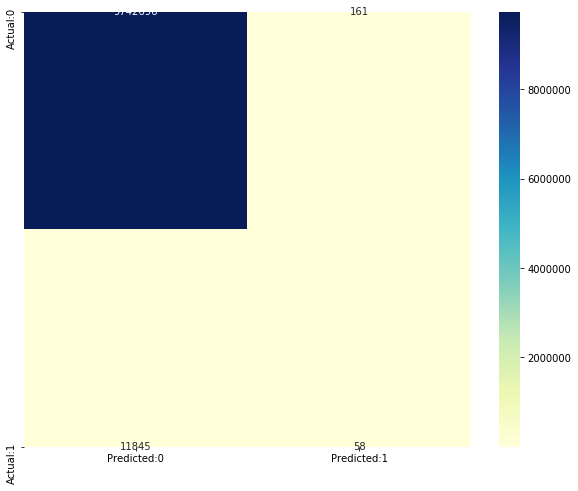

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [14]:
cm

array([[9742696,     161],
       [  11845,      58]])

In [ ]:
X_train

,Amount,Zip,MCC,delta_t_s,delta_t_s_card,amt/day_income,merchant_user_state_is_diff,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk
6548602,8.10,44428.0,5812,56400,56400,0.079019,0,0.0,11.0,403.77,44.81,0.027243
20317810,15.31,38650.0,5970,28860,49260,0.223071,0,0.0,26.0,328.79,10.77,0.079078
336885,1.82,77061.0,5814,70740,70740,0.021172,0,0.0,13.0,565.29,15.23,0.022997
22826374,4.19,98467.0,5411,660,660,0.036867,0,0.0,25.0,771.78,17.23,0.032393
2560179,11.32,8901.0,5411,27660,27660,0.039466,0,0.0,37.0,1296.01,22.41,0.028549
...,...,...,...,...,...,...,...,...,...,...,...,...
23794938,12.74,62858.0,5812,0,172080,0.142746,0,0.0,19.0,158.45,2.32,0.119912
4821140,120.00,11236.0,4829,33900,76800,0.947396,0,0.0,25.0,1512.75,63.33,0.016526
5832204,10.04,33062.0,9402,48120,48120,0.091293,0,0.0,29.0,1130.38,20.87,0.025655
19125327,28.16,53206.0,7538,33060,33060,0.504412,0,0.0,7.0,89.12,6.06,0.078546
